# Get the image of a given row

In [105]:
rowNumber = 123456

In [106]:
import pandas as pd

df = pd.read_csv('../data/GalaxyZoo1_DR_table2.csv')

print(f"Row number: {rowNumber}")
row = df.iloc[rowNumber]

coords = {'RA': row['RA'], 'DEC': row['DEC']}
coords

Row number: 123456


{'RA': '09:20:48.26', 'DEC': '+02:48:10.4'}

In [107]:
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_str = coords['RA']
dec_str = coords['DEC']

coord = SkyCoord(ra_str, dec_str, unit=(u.hourangle, u.deg), frame="icrs")

degree_coords = {'RA': coord.ra.deg, 'DEC': coord.dec.deg}
degree_coords

{'RA': np.float64(140.20108333333334), 'DEC': np.float64(2.8028888888888885)}

#### Get Image from SDSS API

In [108]:
import requests
from PIL import Image
from io import BytesIO

# API ref: https://skyserver.sdss.org/dr16/en/help/docs/api.aspx#imgcutout
path = 'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg'
query = {
    'ra': degree_coords['RA'],
    'dec': degree_coords['DEC'],
    'scale': 0.1,
    'width': 220,
    'height': 220,
    'opt': ''
}

response = requests.get(path, params=query)

jpeg_image = Image.open(BytesIO(response.content))

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): skyserver.sdss.org:443
DEBUG:urllib3.connectionpool:https://skyserver.sdss.org:443 "GET /dr16/SkyServerWS/ImgCutout/getjpeg?ra=140.20108333333334&dec=2.8028888888888885&scale=0.1&width=220&height=220&opt= HTTP/1.1" 200 3000


#### Get Image from SkyView

In [109]:
from astroquery.skyview import SkyView
import astropy.units as u
import logging
logging.basicConfig(level=logging.WARNING)

position = f"{degree_coords['RA']} {degree_coords['DEC']}"
print(f"Position: {position}")

# images = SkyView.get_images(position='Eta Carinae', survey=['DSS'])
images = SkyView.get_images(position=position, survey=['SDSSg'], height=0.005 * u.deg, width=0.005 * u.deg, pixels=2000)
print(f"Number of images: {len(images)}")

hdu_list = images[0]
image_hdu = hdu_list[0]
image_hdu

Position: 140.20108333333334 2.8028888888888885


DEBUG:urllib3.connectionpool:Resetting dropped connection: skyview.gsfc.nasa.gov
DEBUG:urllib3.connectionpool:https://skyview.gsfc.nasa.gov:443 "GET /current/cgi/runquery.pl?coordinates=J2000&projection=Tan&pixels=2000&float=on&scaling=Log+Sqrt+Linear+HistEq+LogLog&resolver=SIMBAD-NED&Sampler=_skip_&Deedger=_skip_&lut=colortables%2Fb-w-linear.bin&grid=_skip_&gridlabels=1&CatalogIDs=on&survey=SDSSg&Position=140.201+2.80288&imscale=0.005%2C0.005&size=0.005%2C0.005 HTTP/1.1" 200 None


Number of images: 1


#### Draw Image from HDU

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (2000, 2000)   float32   


None


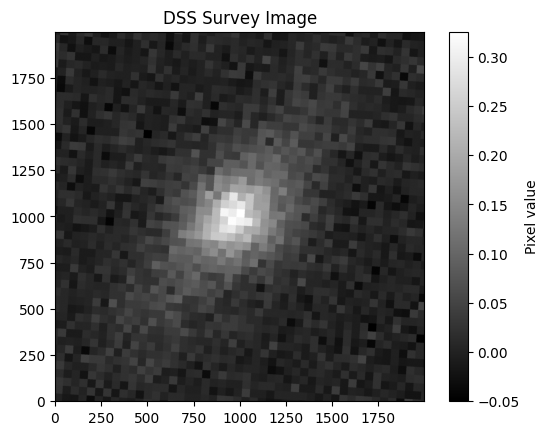

In [110]:
import matplotlib.pyplot as plt

data = image_hdu.data

print(hdu_list.info())

plt.imshow(data, cmap='gray', origin='lower')
plt.title("DSS Survey Image")
plt.colorbar(label='Pixel value')
plt.show()

#### Draw Image from SDSS Jpeg API

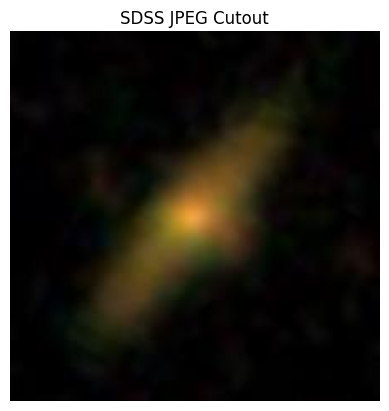

In [111]:
import matplotlib.pyplot as plt

plt.imshow(jpeg_image)
plt.axis("off")
plt.title("SDSS JPEG Cutout")
plt.show()